## Problem statement : To predict whether the salary is below or above 50k

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib inline

### Loading the dataset

In [3]:
dataset=pd.read_csv('C:/Users/shruti/Desktop/csv files/adult_data.csv')

In [4]:
# to display the top 5 rows of the dataset
dataset.head(5)

,Age,workclass,fnlwgt,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking the datatype of variables 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### checking for the number of missing values for each variable

In [7]:
dataset.isnull().sum()

Age               0
workclass         0
fnlwgt            0
Education         0
Education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Text(0, 0.5, 'frequency')

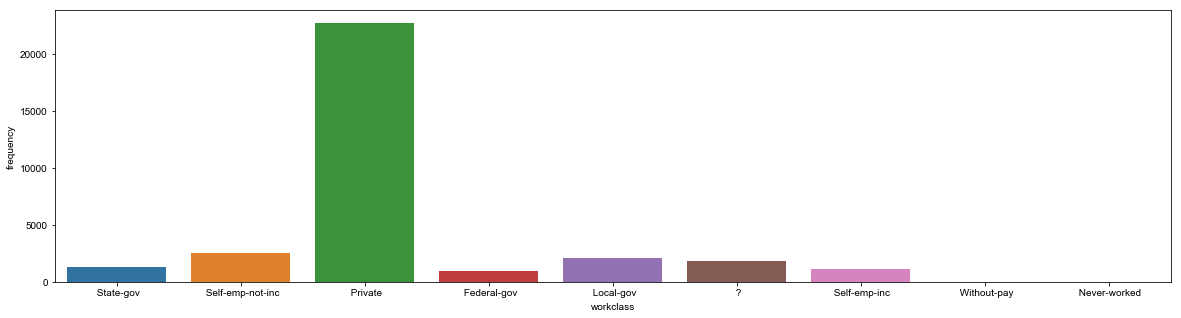

In [8]:
# checking the unique values of object type variables 
# consider workclass feature
plt.figure(figsize=(20,5))
sns.countplot(x='workclass',data=dataset)
sns.set_style('whitegrid')
plt.xlabel('workclass')
plt.ylabel('frequency')

#### workclass is a categorical variable with low cardinality but it has an unknown category stored as ' ? ' .This category is nothing but a missing value expressed in the form of question mark 


#### As missing values can only be identified if they are in the form of np.nan so the question mark didn't got identified as null value 

#### Also there is a white space before the question mark !

In [9]:
#at first removing the white spaces
trimmed_df=dataset.apply(lambda x: x.str.strip() if x.dtype==object else x)

In [10]:
list1=trimmed_df.columns
print(list1)

Index(['Age', 'workclass', 'fnlwgt', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [11]:
#filtering out the features with object datatype
my_list=[i for i in list1 if type(trimmed_df[i][0])==str]

In [12]:
my_list

['workclass',
 'Education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [13]:
#finding out variables with '?'
length=len(dataset['workclass'])
null_list=[]
for i in my_list:
    for j in range(0,length):
        if trimmed_df[i][j]=='?':
            null_list.append(i)
            break

In [14]:
null_list

['workclass', 'occupation', 'native-country']

#### replacing '?' with np.nan

In [15]:
trimmed_df['workclass'] = trimmed_df['workclass'].map(lambda x: np.nan if x=="?"  else x)
trimmed_df['occupation'] = trimmed_df['occupation'].map(lambda x: np.nan if x=="?"  else x)
trimmed_df['native-country'] = trimmed_df['native-country'].map(lambda x: np.nan if x=="?"  else x)

In [16]:
trimmed_df.isnull().sum()

Age                  0
workclass         1836
fnlwgt               0
Education            0
Education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [17]:
trimmed_df.head(10)

,Age,workclass,fnlwgt,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [18]:
trimmed_df[trimmed_df['Education']=='Bachelors']

,Age,workclass,fnlwgt,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
41,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
42,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,<=50K


In [19]:
trimmed_df[trimmed_df['Education']=='Masters']

,Age,workclass,fnlwgt,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
102,47,Self-emp-not-inc,149116,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
135,38,Federal-gov,125933,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Iran,>50K
162,44,Self-emp-inc,78374,Masters,14,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K
164,45,Self-emp-not-inc,201080,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


#### here we can see that every value in 'Education' column is referred as a number in 'Education-num' column. So it means education-num is a numeric representation of education and hence of these columns can be dropped.

#### drop the column which is in string format as the model needs only columns with numeric values

In [20]:
#dropping education column
trimmed_df=trimmed_df.drop(columns=['Education'])

In [21]:
trimmed_df.shape

(32561, 14)

### Handling missing values

In [22]:
trimmed_df.isnull().sum()

Age                  0
workclass         1836
fnlwgt               0
Education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

### Seperating the dependent and independent features

In [27]:
x=trimmed_df.iloc[:,0:13].values
y=trimmed_df.iloc[:,13].values

In [28]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
impute=impute.fit(x[:,12:13])
x[:,12:13]=impute.fit_transform(x[:,12:13]) #FOR NATIVE-COUNTRY

In [29]:
impute=impute.fit(x[:,1:2])
x[:,1:2]=impute.fit_transform(x[:,1:2]) #FOR WORKCLASS

In [30]:
impute=impute.fit(x[:,5:6])
x[:,5:6]=impute.fit_transform(x[:,5:6]) #FOR OCCUPATION

### Dropping the unnecessary columns

#### Since marital-status ,relationship and race doesnt make any difference in the salary of any person these columns can be removed 

In [31]:
x=np.delete(x,[4,6,7],axis=1)

In [32]:
print(x)

[[39 'State-gov' 77516 ... 0 40 'United-States']
 [50 'Self-emp-not-inc' 83311 ... 0 13 'United-States']
 [38 'Private' 215646 ... 0 40 'United-States']
 ...
 [58 'Private' 151910 ... 0 40 'United-States']
 [22 'Private' 201490 ... 0 20 'United-States']
 [52 'Self-emp-inc' 287927 ... 0 40 'United-States']]


In [33]:
x1=np.column_stack((x,y))

In [34]:
x1.shape

(32561, 11)

In [35]:
dataset=pd.DataFrame(data=x1,columns=['Age','workclass','fnlwgt',
 'Education-num',
 'occupation',
 'sex','capital-gain','capital-loss','hours-per-week',
 'native-country',
 'salary'])

In [36]:
dataset.head()

,Age,workclass,fnlwgt,Education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [37]:
dataset.isnull().sum()

Age               0
workclass         0
fnlwgt            0
Education-num     0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Encoding the categorical features

In [38]:
#consider sex feature
#performing label encoding
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
dataset['sex']=encode.fit_transform(dataset['sex'])

In [39]:
#consider workclass 
dataset['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [40]:
counts={'Private':22696,'Self-emp-not-inc':2541,'Local-gov':2093,'State-gov':1298,'Self-emp-inc':1116,'Federal-gov':960,'Without-pay':14,'Never-worked':7}

In [41]:
#mapping the feature wrt frequency of each unique value
dataset['workclass']=dataset['workclass'].map(counts)

In [42]:
dataset.head()

,Age,workclass,fnlwgt,Education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,1298,77516,13,Adm-clerical,1,2174,0,40,United-States,<=50K
1,50,2541,83311,13,Exec-managerial,1,0,0,13,United-States,<=50K
2,38,22696,215646,9,Handlers-cleaners,1,0,0,40,United-States,<=50K
3,53,22696,234721,7,Handlers-cleaners,1,0,0,40,United-States,<=50K
4,28,22696,338409,13,Prof-specialty,0,0,0,40,Cuba,<=50K


In [43]:
dataset['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [44]:
counts_occ={'Prof-specialty':5983,'Craft-repair':4099,'Exec-managerial':4066,'Adm-clerical':3770,'Sales':3650,'Other-service':3295,
           'Machine-op-inspct':2002,'Transport-moving':1597,'Handlers-cleaners':1370,'Farming-fishing':994,'Tech-support':928,
           'Protective-serv':649,'Priv-house-serv':149,'Armed-Forces':9}

In [45]:
#mapping the feature wrt frequency of each unique value
dataset['occupation']=dataset['occupation'].map(counts_occ)

In [46]:
dataset['native-country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [47]:
import category_encoders as ce

In [48]:
bin_encoder=ce.BinaryEncoder(cols=['native-country'])

In [49]:
dataset=bin_encoder.fit_transform(dataset)

In [50]:
dataset.head()

,Age,workclass,fnlwgt,Education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,salary
0,39,1298,77516,13,3770,1,2174,0,40,0,0,0,0,0,0,1,<=50K
1,50,2541,83311,13,4066,1,0,0,13,0,0,0,0,0,0,1,<=50K
2,38,22696,215646,9,1370,1,0,0,40,0,0,0,0,0,0,1,<=50K
3,53,22696,234721,7,1370,1,0,0,40,0,0,0,0,0,0,1,<=50K
4,28,22696,338409,13,5983,0,0,0,40,0,0,0,0,0,1,0,<=50K


In [51]:
#performing label encoding on target variable i.e salary
encode_salary=LabelEncoder()
dataset['salary']=encode_salary.fit_transform(dataset['salary'])

In [52]:
dataset.head(10)

,Age,workclass,fnlwgt,Education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,salary
0,39,1298,77516,13,3770,1,2174,0,40,0,0,0,0,0,0,1,0
1,50,2541,83311,13,4066,1,0,0,13,0,0,0,0,0,0,1,0
2,38,22696,215646,9,1370,1,0,0,40,0,0,0,0,0,0,1,0
3,53,22696,234721,7,1370,1,0,0,40,0,0,0,0,0,0,1,0
4,28,22696,338409,13,5983,0,0,0,40,0,0,0,0,0,1,0,0
5,37,22696,284582,14,4066,0,0,0,40,0,0,0,0,0,0,1,0
6,49,22696,160187,5,3295,0,0,0,16,0,0,0,0,0,1,1,0
7,52,2541,209642,9,4066,1,0,0,45,0,0,0,0,0,0,1,1
8,31,22696,45781,14,5983,0,14084,0,50,0,0,0,0,0,0,1,1
9,42,22696,159449,13,4066,1,5178,0,40,0,0,0,0,0,0,1,1


### Separating the independent and dependent features

In [53]:
x=dataset.iloc[:,0:16].values
y=dataset.iloc[:,16].values

#### Splitting the dataset into training and test data

In [54]:
# using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Applying naive bayes classifier and training the model 

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
predictions=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [57]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,predictions)

In [58]:
accuracy

0.8016275142023646

### It gives us an accuracy of 80% that means our model can predict the salary of an unknown data with an accuracy of 80% 